In [35]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('空气质量指数预测挑战赛公开数据/train.csv')
test_data = pd.read_csv('空气质量指数预测挑战赛公开数据/test.csv')

In [36]:
train_data.head(1)

,date,stationID,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,target
0,2018010100,0,78.43,120.06,23.79,126.91,79.66,19.88,23.79,74.95,24.63,11.18,40.92,3.21,340.0


In [37]:
test_data.head(1)

,date,stationID
0,2020060100,0


<Axes: >

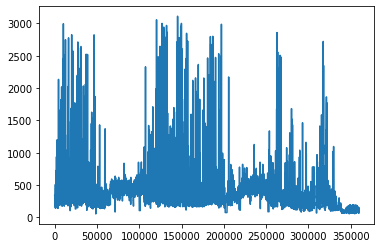

In [38]:
train_data[train_data['stationID'] == 0]['target'].plot()

In [39]:
train_data['new_date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')
test_data['new_date'] = pd.to_datetime(test_data['date'], format='%Y%m%d%H')

In [40]:
train_data['new_date_hour'] = train_data['new_date'].dt.hour
test_data['new_date_hour'] = test_data['new_date'].dt.hour

In [41]:
mean_target = train_data.groupby(['stationID', 'new_date_hour'])['target'].mean().reset_index()

In [42]:
pd.merge(test_data, mean_target, 
         on=['stationID', 'new_date_hour'], how='left'
)[['date', 'stationID', 'target']].to_csv('submit.csv', index=None)